
# Lasso model selection: AIC-BIC / cross-validation

This example focuses on model selection for Lasso models that are
linear models with an L1 penalty for regression problems.

Indeed, several strategies can be used to select the value of the
regularization parameter: via cross-validation or using an information
criterion, namely AIC or BIC.

In what follows, we will discuss in details the different strategies.


In [1]:
# Author: Olivier Grisel
#         Gael Varoquaux
#         Alexandre Gramfort
#         Guillaume Lemaitre
# License: BSD 3 clause

## Dataset
In this example, we will use the diabetes dataset.



In [2]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head()

C:\Program Files\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In addition, we add some random features to the original data to
better illustrate the feature selection performed by the Lasso model.



In [3]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(42)
n_random_features = 14
X_random = pd.DataFrame(
    rng.randn(X.shape[0], n_random_features),
    columns=[f"random_{i:02d}" for i in range(n_random_features)],
)
X = pd.concat([X, X_random], axis=1)
# Show only a subset of the columns
X[X.columns[::3]].head()

,age,bp,s3,s6,random_02,random_05,random_08,random_11
0,0.038076,0.021872,-0.043401,-0.017646,0.647689,-0.234137,-0.469474,-0.465730
1,-0.001882,-0.026328,0.074412,-0.092204,-1.012831,-1.412304,0.067528,0.110923
2,0.085299,-0.005671,-0.032356,-0.025930,-0.601707,-1.057711,0.208864,0.196861
3,-0.089063,-0.036656,-0.036038,-0.009362,-1.478522,1.057122,0.324084,0.611676
4,0.005383,0.021872,0.008142,-0.046641,0.331263,-0.185659,0.812526,1.003533


In [4]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,random_04,random_05,random_06,random_07,random_08,random_09,random_10,random_11,random_12,random_13
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,...,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,...,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,...,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0.738467,0.171368
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,...,-0.460639,1.057122,0.343618,-1.763040,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,...,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120


## Selecting Lasso via an information criterion
:class:`~sklearn.linear_model.LassoLarsIC` provides a Lasso estimator that
uses the Akaike information criterion (AIC) or the Bayes information
criterion (BIC) to select the optimal value of the regularization
parameter alpha.

Before fitting the model, we will standardize the data with a
:class:`~sklearn.preprocessing.StandardScaler`. In addition, we will
measure the time to fit and tune the hyperparameter alpha in order to
compare with the cross-validation strategy.

We will first fit a Lasso model with the AIC criterion.



In [5]:
import time

from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(X, y)
fit_time = time.time() - start_time

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


We store the AIC metric for each value of alpha used during `fit`.



In [6]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

Now, we perform the same analysis using the BIC criterion.



In [7]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


We can check which value of `alpha` leads to the minimum AIC and BIC.



In [8]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
2.148044,5244.765686,5244.765686
2.012027,5208.252839,5212.344149
1.024663,4928.021378,4936.203998
0.715100,4869.678327,4881.952257
0.294414,4815.437203,4831.802443
0.253503,4810.422702,4830.879251
0.204812,4803.572132,4828.119992
0.196174,4804.126582,4832.765751
0.181730,4803.620474,4836.350953


Finally, we can plot the AIC and BIC values for the different alpha values.
The vertical lines in the plot correspond to the alpha chosen for each
criterion. The selected alpha corresponds to the minimum of the AIC or BIC
criterion.



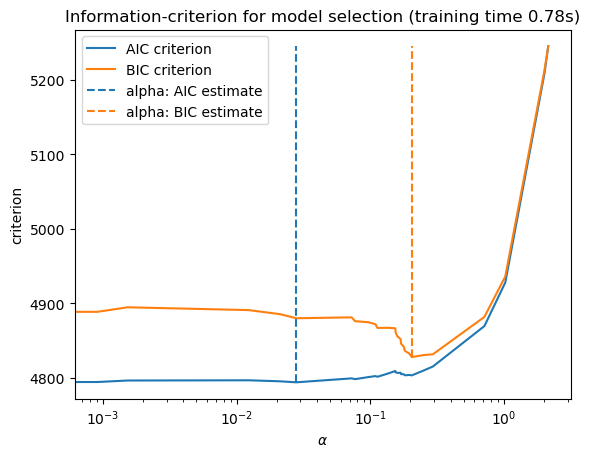

In [9]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)

Model selection with an information-criterion is very fast. It relies on
computing the criterion on the in-sample set provided to `fit`. Both criteria
estimate the model generalization error based on the training set error and
penalize this overly optimistic error. However, this penalty relies on a
proper estimation of the degrees of freedom and the noise variance. Both are
derived for large samples (asymptotic results) and assume the model is
correct, i.e. that the data are actually generated by this model.

These models also tend to break when the problem is badly conditioned (more
features than samples). It is then required to provide an estimate of the
noise variance.

## Selecting Lasso via cross-validation
The Lasso estimator can be implemented with different solvers: coordinate
descent and least angle regression. They differ with regards to their
execution speed and sources of numerical errors.

In scikit-learn, two different estimators are available with integrated
cross-validation: :class:`~sklearn.linear_model.LassoCV` and
:class:`~sklearn.linear_model.LassoLarsCV` that respectively solve the
problem with coordinate descent and least angle regression.

In the remainder of this section, we will present both approaches. For both
algorithms, we will use a 20-fold cross-validation strategy.

### Lasso via coordinate descent
Let's start by making the hyperparameter tuning using
:class:`~sklearn.linear_model.LassoCV`.



In [10]:
from sklearn.linear_model import LassoCV

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoCV(cv=20)).fit(X, y)
fit_time = time.time() - start_time

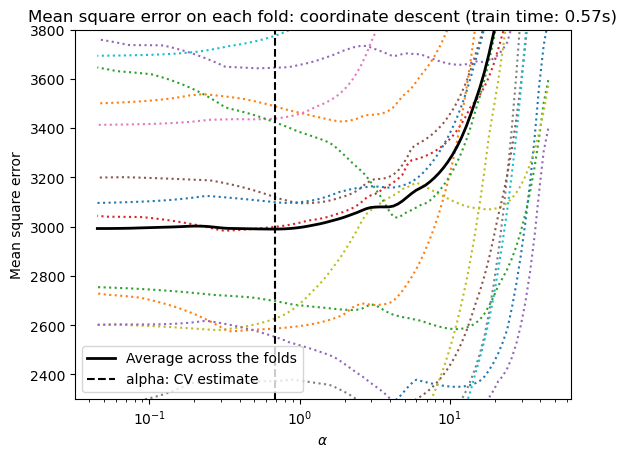

In [11]:
import matplotlib.pyplot as plt

ymin, ymax = 2300, 3800
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

### Lasso via least angle regression
Let's start by making the hyperparameter tuning using
:class:`~sklearn.linear_model.LassoLarsCV`.



In [12]:
from sklearn.linear_model import LassoLarsCV

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoLarsCV(cv=20)).fit(X, y)
fit_time = time.time() - start_time

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


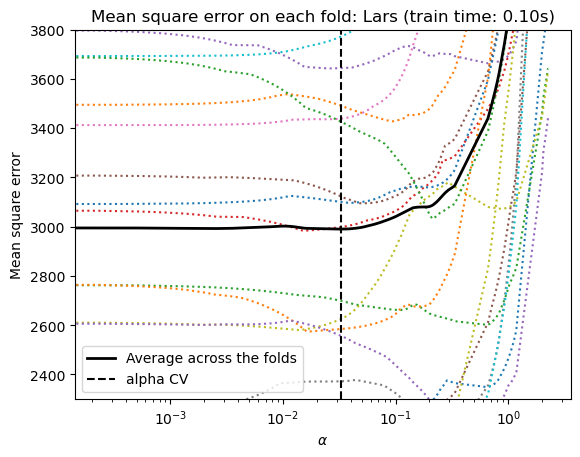

In [13]:
lasso = model[-1]
plt.semilogx(lasso.cv_alphas_, lasso.mse_path_, ":")
plt.semilogx(
    lasso.cv_alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha CV")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(f"Mean square error on each fold: Lars (train time: {fit_time:.2f}s)")

### Summary of cross-validation approach
Both algorithms give roughly the same results.

Lars computes a solution path only for each kink in the path. As a result, it
is very efficient when there are only of few kinks, which is the case if
there are few features or samples. Also, it is able to compute the full path
without setting any hyperparameter. On the opposite, coordinate descent
computes the path points on a pre-specified grid (here we use the default).
Thus it is more efficient if the number of grid points is smaller than the
number of kinks in the path. Such a strategy can be interesting if the number
of features is really large and there are enough samples to be selected in
each of the cross-validation fold. In terms of numerical errors, for heavily
correlated variables, Lars will accumulate more errors, while the coordinate
descent algorithm will only sample the path on a grid.

Note how the optimal value of alpha varies for each fold. This illustrates
why nested-cross validation is a good strategy when trying to evaluate the
performance of a method for which a parameter is chosen by cross-validation:
this choice of parameter may not be optimal for a final evaluation on
unseen test set only.

## Conclusion
In this tutorial, we presented two approaches for selecting the best
hyperparameter `alpha`: one strategy finds the optimal value of `alpha`
by only using the training set and some information criterion, and another
strategy is based on cross-validation.

In this example, both approaches are working similarly. The in-sample
hyperparameter selection even shows its efficacy in terms of computational
performance. However, it can only be used when the number of samples is large
enough compared to the number of features.

That's why hyperparameter optimization via cross-validation is a safe
strategy: it works in different settings.

